In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Adjust width for better readability

df = pd.read_csv( 'cleaned_data_1.csv' )

print( df.dtypes )
print( df.head() )




timestamp           object
application         object
activity_type       object
activity_subtype    object
duration             int64
date                object
hour                 int64
dtype: object
             timestamp application activity_type            activity_subtype  duration     date  hour
0  2021-01-22 17:00:00        shed    Focus Work                  Operations       342  1/22/21    17
1  2021-01-22 17:00:00       email    Focus Work  Email & Customer Relations       249  1/22/21    17
2  2021-01-22 17:00:00      finder     Utilities                     General       216  1/22/21    17
3  2021-01-22 17:00:00       slack    Focus Work              Communications       169  1/22/21    17
4  2021-01-22 17:00:00       slack    Focus Work              Communications       145  1/22/21    17


/var/folders/3f/pq1wlf6x2sj8f0xzmdxg1z8m0000gn/T/ipykernel_9814/3129536435.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_range = pd.date_range( start=df['date'].min(), end=df['date'].max(), freq='M' ).to_period( 'M' ).astype( str )


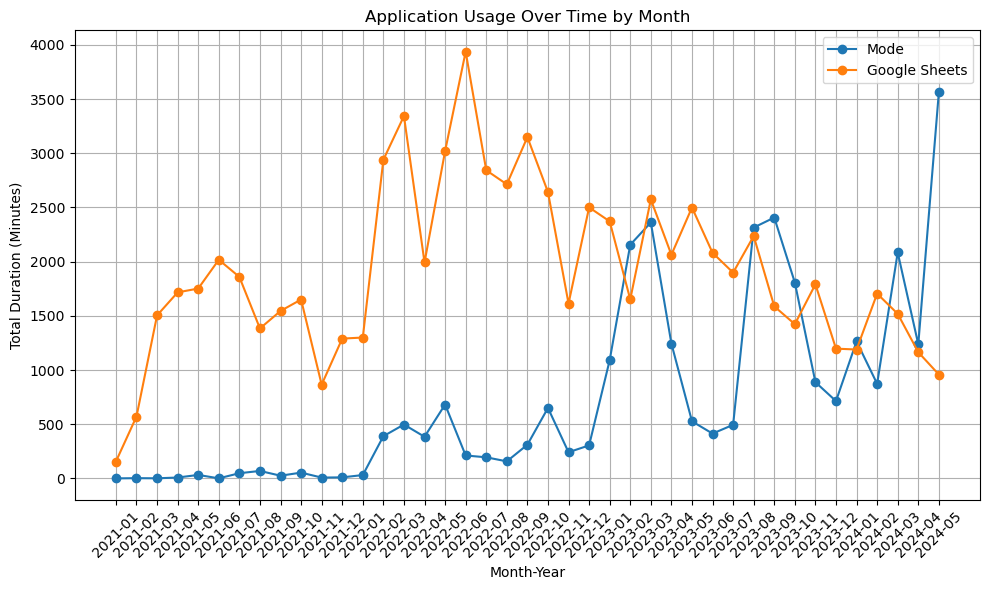

In [2]:

# Ensure 'date' is in datetime format and extract month and year
df['date'] = pd.to_datetime( df['date'], format='%m/%d/%y' )
df['month_year'] = df['date'].dt.to_period( 'M' ).astype( str )

# Create a full range of month-year combinations using 'M'
full_range = pd.date_range( start=df['date'].min(), end=df['date'].max(), freq='M' ).to_period( 'M' ).astype( str )

# Filter and group by month for "Mode"
mode_data = df.loc[df['application'] == 'mode'].copy()
mode_data['duration'] = mode_data['duration'] / 60
mode_usage_by_month = mode_data.groupby( 'month_year' )['duration'].sum().reindex( full_range, fill_value=0 ).reset_index()
mode_usage_by_month.columns = ['month_year', 'duration']  # Ensure correct column names

# Filter and group by month for "Google Sheets"
sheets_data = df.loc[df['application'] == 'google sheets'].copy()
sheets_data['duration'] = sheets_data['duration'] / 60
sheets_usage_by_month = sheets_data.groupby( 'month_year' )['duration'].sum().reindex( full_range, fill_value=0 ).reset_index()
sheets_usage_by_month.columns = ['month_year', 'duration']  # Ensure correct column names

# Plot both lines
plt.figure( figsize=( 10, 6 ) )

# Plot for Mode
plt.plot( mode_usage_by_month['month_year'], mode_usage_by_month['duration'], marker='o', label='Mode' )

# Plot for Google Sheets
plt.plot( sheets_usage_by_month['month_year'], sheets_usage_by_month['duration'], marker='o', label='Google Sheets' )

# Labels and grid
plt.title( 'Application Usage Over Time by Month' )
plt.xlabel( 'Month-Year' )
plt.ylabel( 'Total Duration (Minutes)' )
plt.grid( True )
plt.xticks( rotation=45 )
plt.legend()  # Add a legend to distinguish the lines
plt.tight_layout()
plt.show()

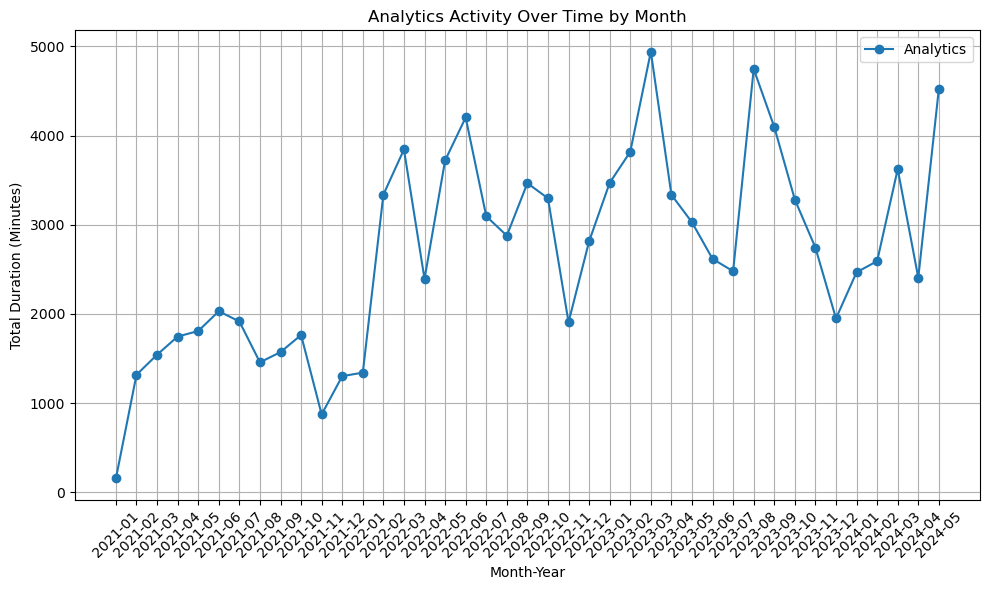

In [3]:
# Filter and group by month for "Analytics" activity_subtype
analytics_data = df.loc[df['activity_subtype'] == 'analytics'].copy()
analytics_data['duration'] = analytics_data['duration'] / 60  # Convert seconds to minutes
analytics_usage_by_month = analytics_data.groupby( 'month_year' )['duration'].sum().reindex( full_range, fill_value=0 ).reset_index()
analytics_usage_by_month.columns = ['month_year', 'duration']  # Ensure correct column names

# Plot the line for Analytics
plt.figure( figsize=( 10, 6 ) )

plt.plot( analytics_usage_by_month['month_year'], analytics_usage_by_month['duration'], marker='o', label='Analytics' )

# Labels and grid
plt.title( 'Analytics Activity Over Time by Month' )
plt.xlabel( 'Month-Year' )
plt.ylabel( 'Total Duration (Minutes)' )
plt.grid(True)
plt.xticks( rotation=45 )
plt.legend()  # Add a legend to distinguish the line
plt.tight_layout()
plt.show()

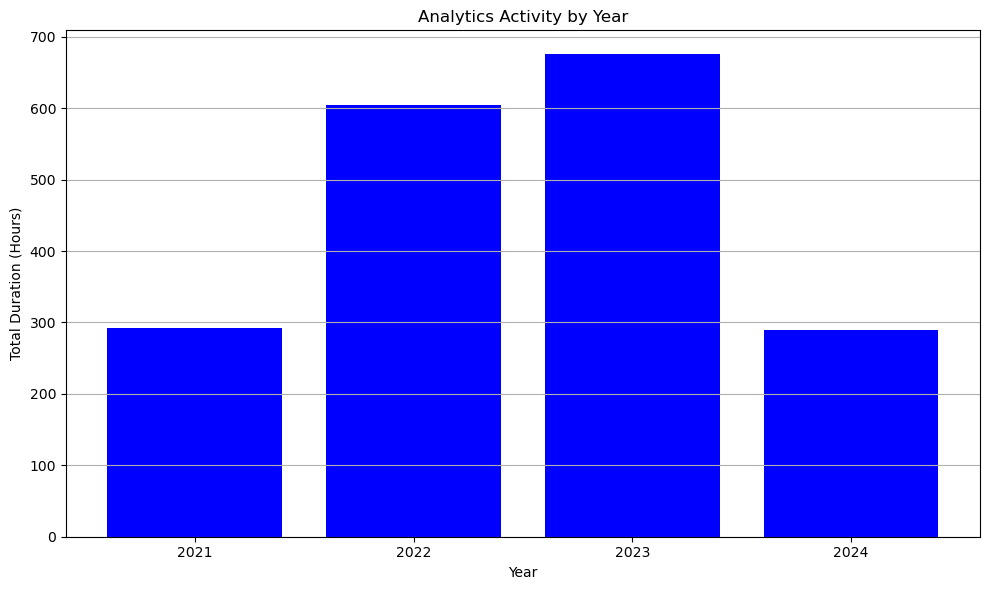

In [4]:

# Ensure 'date' is in datetime format and extract the year
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['year'] = df['date'].dt.year

# Filter and group by year for "Analytics" activity_subtype
analytics_data = df.loc[df['activity_subtype'] == 'analytics'].copy()
analytics_data['duration'] = analytics_data['duration'] / 3600  # Convert seconds to hours
analytics_usage_by_year = analytics_data.groupby('year')['duration'].sum().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))

plt.bar(analytics_usage_by_year['year'], analytics_usage_by_year['duration'], color='blue')

# Set x-ticks to only show the actual years present in the data
plt.xticks(analytics_usage_by_year['year'])

# Labels and grid
plt.title('Analytics Activity by Year')
plt.xlabel('Year')
plt.ylabel('Total Duration (Hours)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

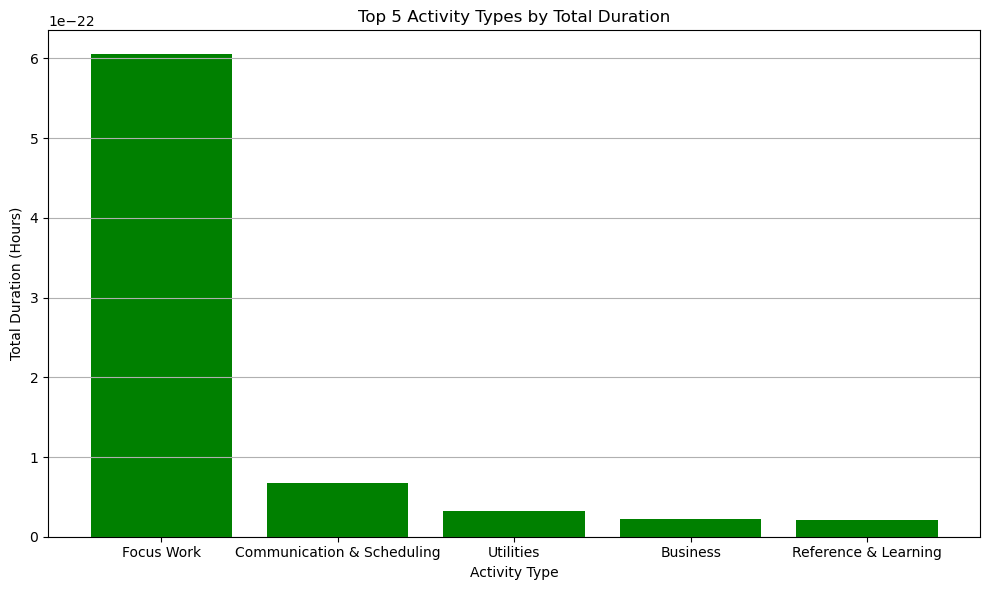

Top 3 applications for Focus Work:
google sheets
slack
shed


Top 3 applications for Communication & Scheduling:


Top 3 applications for Utilities:


Top 3 applications for Business:


Top 3 applications for Reference & Learning:




In [23]:
# Ensure 'duration' is in the correct unit (hours)
df['duration'] = df['duration'] / 3600  # Convert seconds to hours if needed

# Calculate the total duration for each activity_type
activity_type_totals = df.groupby('activity_type')['duration'].sum().reset_index()

# Sort and select the top 5 activity_types
top_5_activity_types = activity_type_totals.sort_values(by='duration', ascending=False).head(5)
top_10_types = activity_type_totals.sort_values(by='duration', ascending=False).head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))

plt.bar(top_5_activity_types['activity_type'], top_5_activity_types['duration'], color='green')

# Labels and grid
plt.title('Top 5 Activity Types by Total Duration')
plt.xlabel('Activity Type')
plt.ylabel('Total Duration (Hours)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 5: Display the top 5 applications for each of the top 10 activity_subtypes
for type in top_5_activity_types['activity_type']:
    print(f"Top 3 applications for {type}:")
    top_apps = (focus_work_data[focus_work_data['activity_type'] == type]
                .groupby('application')['duration']
                .sum()
                .sort_values(ascending=False)
                .index[:3])  # Get the top 3 application names
    
    # Print the application names
    for app in top_apps:
        print(app)
    print("\n")

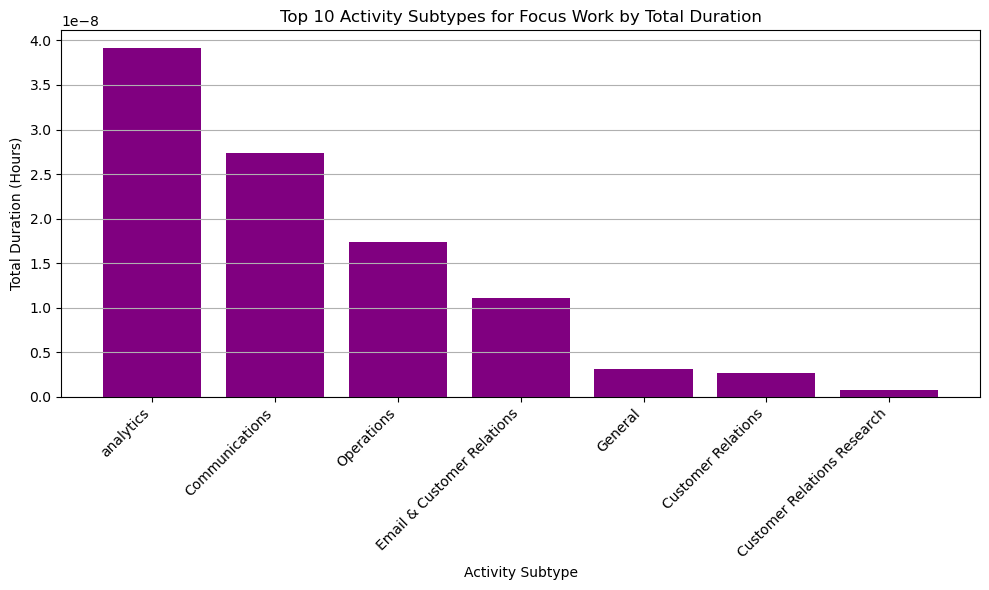

Top 3 applications for analytics:
google sheets
mode


Top 3 applications for Communications:
slack


Top 3 applications for Operations:
shed
salesforce


Top 3 applications for Email & Customer Relations:
email
app.carerev.com


Top 3 applications for General:
checkr
preview
karmacheck


Top 3 applications for Customer Relations:
adobe


Top 3 applications for Customer Relations Research:
nursys
ecards.heart.org
mqa-internet.doh.state.fl.us




In [15]:


# Ensure 'duration' is in the correct unit (hours)
df['duration'] = df['duration'] / 3600  # Convert seconds to hours if needed

# Step 1: Filter the data for 'Focus Work'
focus_work_data = df[df['activity_type'] == 'Focus Work']

# Step 2: Calculate the total duration for each activity_subtype within 'Focus Work'
subtype_totals = focus_work_data.groupby('activity_subtype')['duration'].sum().reset_index()

# Step 3: Sort and select the top 10 activity_subtypes
top_10_subtypes = subtype_totals.sort_values(by='duration', ascending=False).head(10)

# Step 4: Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_subtypes['activity_subtype'], top_10_subtypes['duration'], color='purple')
plt.title('Top 10 Activity Subtypes for Focus Work by Total Duration')
plt.xlabel('Activity Subtype')
plt.ylabel('Total Duration (Hours)')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 5: Display the top 5 applications for each of the top 10 activity_subtypes
for subtype in top_10_subtypes['activity_subtype']:
    print(f"Top 3 applications for {subtype}:")
    top_apps = (focus_work_data[focus_work_data['activity_subtype'] == subtype]
                .groupby('application')['duration']
                .sum()
                .sort_values(ascending=False)
                .index[:3])  # Get the top 3 application names
    
    # Print the application names
    for app in top_apps:
        print(app)
    print("\n")